# Dowload an unWISE image  #

We are planning to run galfit on some unWISE images.  Here is one way to get the unWISE image for a specific galaxy using unwise.me.


Written by Rose Finn, November 14, 2017.

## Load python modules

In [71]:
import numpy as np
from astroquery.sdss import SDSS
from astroquery.ned import Ned
from astropy import coordinates as coords
import astropy.units as u
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.io import fits
import wget
from scipy.stats import scoreatpercentile
import tarfile

## NED Query

Using NED to find the coordinates of an object that we know the name of.

In [72]:
galaxy_name = 'NGC5320'
result_table = Ned.query_object(galaxy_name)

In [73]:
pos = coords.SkyCoord(ra=result_table['RA(deg)'][0]*u.deg,dec=result_table['DEC(deg)'][0]*u.deg, frame='icrs')
print pos.ra.deg
print pos.dec.deg

207.58491
41.36622


## Construct url

use RA and DEC to construct the image url.

In [74]:
baseurl = 'http://unwise.me/cutout_fits?version=allwise'
ra = pos.ra.deg
dec = pos.dec.deg
wisefilter = '3' # 12 micron
imsize = '100' # max size = 256 pixels
bands='34'
#version=neo1&ra=41&dec=10&size=100&bands=12
imurl = baseurl+'&ra=%.5f&dec=%.5f&size=%s&bands=%s'%(ra,dec,imsize,bands)

In [75]:
print imurl

http://unwise.me/cutout_fits?version=allwise&ra=207.58491&dec=41.36622&size=100&bands=34


In [76]:
# this will download a tar file
wisetar = wget.download(imurl)

In [77]:
tartemp = tarfile.open(wisetar,mode='r:gz')

In [78]:
wnames = tartemp.getnames()
wmembers = tartemp.getmembers()

In [79]:
print filelist

['unwise-2076p408-w3-img-m.fits', 'unwise-2076p408-w3-invvar-m.fits.gz', 'unwise-2076p408-w3-n-m.fits.gz', 'unwise-2076p408-w3-std-m.fits.gz', 'unwise-2076p408-w4-img-m.fits', 'unwise-2076p408-w4-invvar-m.fits.gz', 'unwise-2076p408-w4-n-m.fits.gz', 'unwise-2076p408-w4-std-m.fits.gz']


In [80]:
tartemp.extract(wmembers[0])
# to extract all files use
# tartemp.extractall()
# see https://docs.python.org/2/library/tarfile.html for more details

In [81]:
wisedat = fits.getdata(filelist[0])

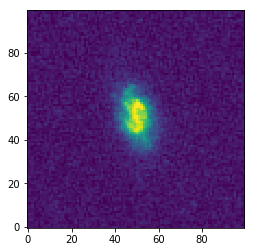

In [82]:
plt.imshow(wisedat,origin='lower',vmin=scoreatpercentile(wisedat,2.5),vmax=scoreatpercentile(wisedat,99.9))#,cmap='gray')